
# Analiza Decision Tree - Weightlifting Dataset

- **Clasificare**: prezicerea probabilitatii ca un set de exercitii sa fie 'heavy' (greutate > 200 lb).
- **Regresie**: prezicerea greutatii folosite pe baza caracteristicilor setului.



In [24]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score

# incarcarea datasetului
df = pd.read_csv("../DataSet/weightlifting_721_workouts.csv")
# Filtrare date valide
df = df.dropna(subset=["Weight", "Reps", "Distance", "Seconds"])
df = df[df["Reps"] > 0]

# Creare target binar 'heavy'
df["heavy"] = (df["Weight"] > 200).astype(int)

# Definire caracteristici si target
features = ["Reps", "Seconds", "Distance"]
X = df[features]
y_cls = df["heavy"]
y_reg = df["Weight"]

# impartire in seturi de antrenament si test
X_train, X_test, y_train_cls, y_test_cls = train_test_split(X, y_cls, test_size=0.3, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.3, random_state=42)

print("Dimensiuni seturi:", X_train.shape, X_test.shape)


Dimensiuni seturi: (6937, 3) (2973, 3)


## 1. Decision Tree Classifier (CART)

Confusion Matrix:
[[1595  268]
 [ 502  608]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1863
           1       0.69      0.55      0.61      1110

    accuracy                           0.74      2973
   macro avg       0.73      0.70      0.71      2973
weighted avg       0.74      0.74      0.73      2973



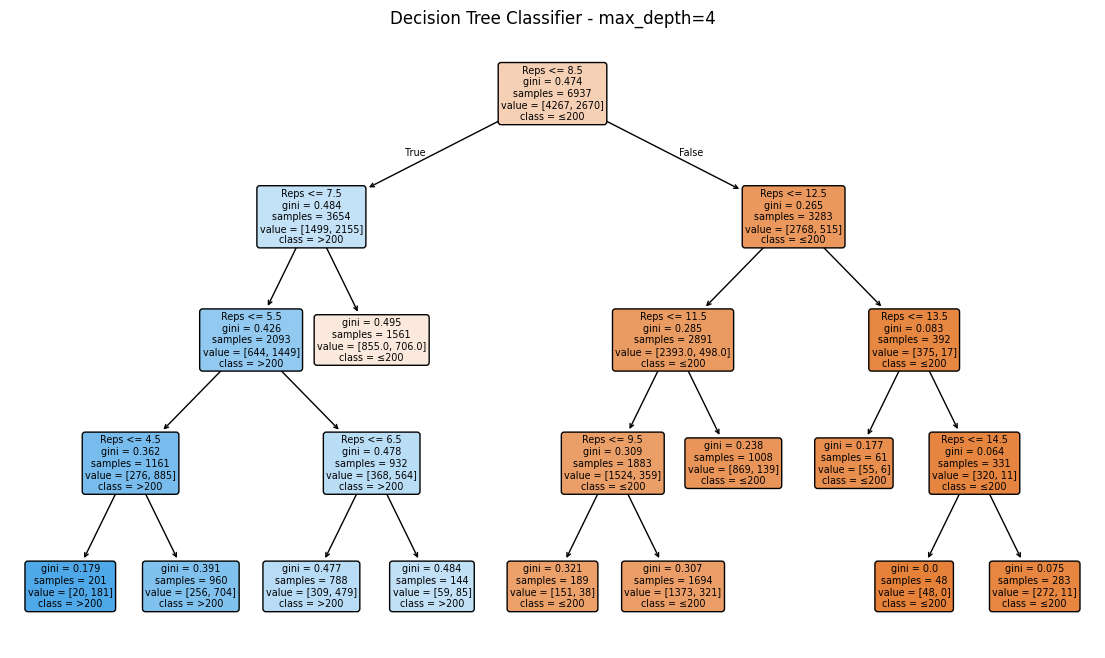

In [29]:

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train_cls)

y_pred_cls = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_cls))
print("\nClassification Report:")
print(classification_report(y_test_cls, y_pred_cls))

plt.figure(figsize=(14,8))
plot_tree(clf, feature_names=features, class_names=["≤200", ">200"], filled=True, rounded=True)
plt.title("Decision Tree Classifier - max_depth=4")
plt.show()



**Concluzii Clasificare**:
- Arborele arată praguri importante în `Reps` și `Seconds` pentru a separa seturile 'heavy'.
- Metoda CART (criteriu Gini) maximizează impuritatea informațională.
- Performanța: modelul clasifică corect majoritatea seturilor (`accuracy`, `precision`, `recall`).


## 2. Decision Tree Regressor (CART)

MSE: 9984.611447052128
R²: 0.2095364972545174


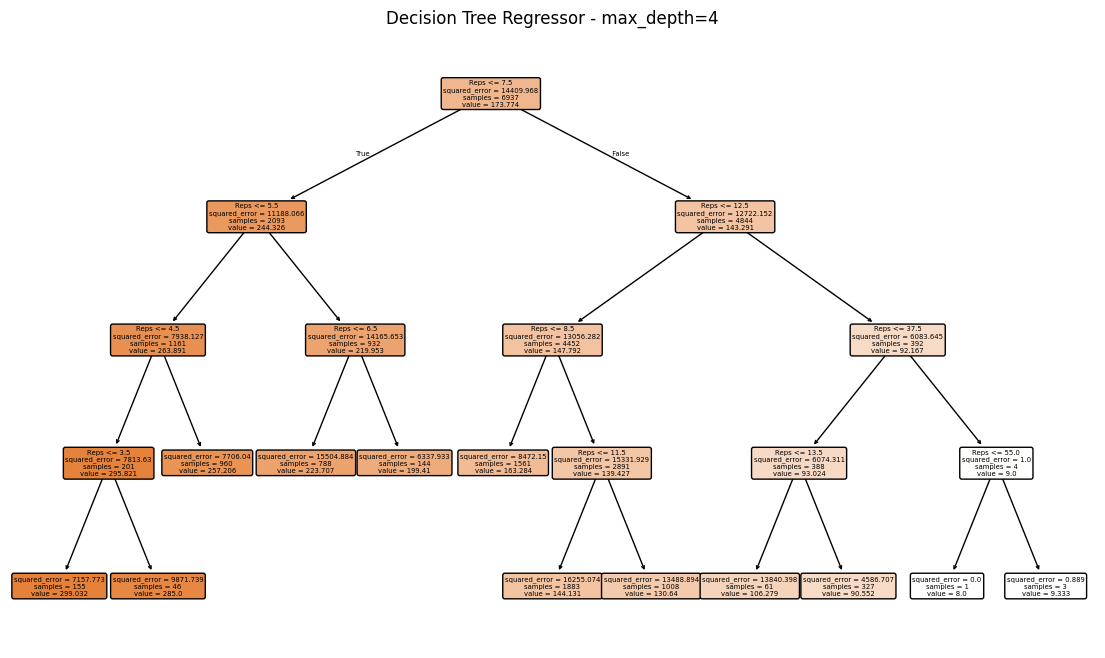

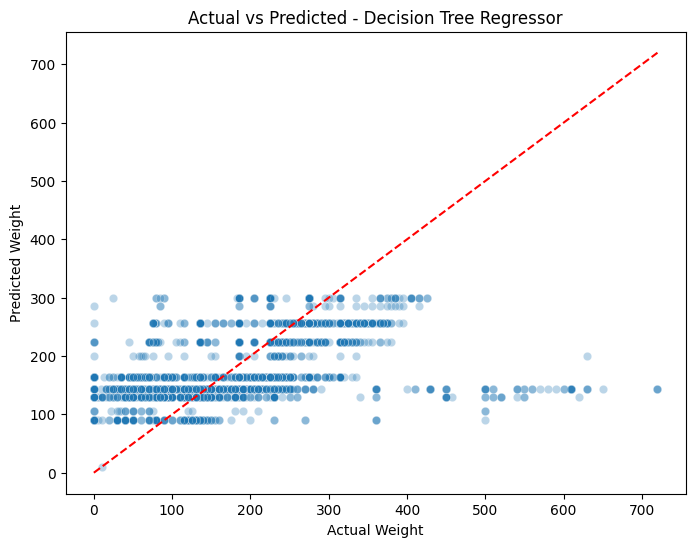

In [26]:

dtr = DecisionTreeRegressor(max_depth=4, random_state=42)
dtr.fit(X_train_r, y_train_r)

y_pred_r = dtr.predict(X_test_r)
print("MSE:", mean_squared_error(y_test_r, y_pred_r))
print("R²:", r2_score(y_test_r, y_pred_r))

plt.figure(figsize=(14,8))
plot_tree(dtr, feature_names=features, filled=True, rounded=True)
plt.title("Decision Tree Regressor - max_depth=4")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_r, y=y_pred_r, alpha=0.3)
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--')
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted - Decision Tree Regressor")
plt.show()



**Concluzii Regresie**:
- Arborele identifică regiuni omogene de greutate bazate pe `Reps` și `Seconds`.
- Precizia predicției este reflectată de `R²` și `MSE`.
- Graficul Actual vs Predicted evidențiază zone de sub- și supra-reglare.


## 3. Importanța caracteristicilor

Reps: 1.000
Seconds: 0.000
Distance: 0.000


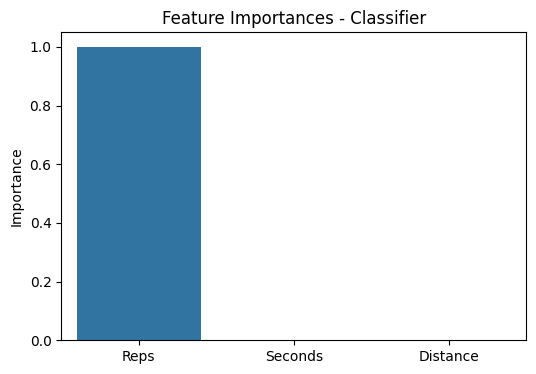

In [27]:

importances = clf.feature_importances_
for name, imp in zip(features, importances):
    print(f"{name}: {imp:.3f}")

plt.figure(figsize=(6,4))
sns.barplot(x=features, y=importances)
plt.title("Feature Importances - Classifier")
plt.ylabel("Importance")
plt.show()



**Observații Importanță**:
- `Reps` are cea mai mare importanță în clasificarea `heavy`.
- `Seconds` și `Distance` contribuie suplimentar, confirmând relevanța multiplă a caracteristicilor.


## 4. Extractarea regulilor din arborele de clasificare

|--- Reps <= 8.50
|   |--- Reps <= 7.50
|   |   |--- Reps <= 5.50
|   |   |   |--- Reps <= 4.50
|   |   |   |   |--- class: 1
|   |   |   |--- Reps >  4.50
|   |   |   |   |--- class: 1
|   |   |--- Reps >  5.50
|   |   |   |--- Reps <= 6.50
|   |   |   |   |--- class: 1
|   |   |   |--- Reps >  6.50
|   |   |   |   |--- class: 1
|   |--- Reps >  7.50
|   |   |--- class: 0
|--- Reps >  8.50
|   |--- Reps <= 12.50
|   |   |--- Reps <= 11.50
|   |   |   |--- Reps <= 9.50
|   |   |   |   |--- class: 0
|   |   |   |--- Reps >  9.50
|   |   |   |   |--- class: 0
|   |   |--- Reps >  11.50
|   |   |   |--- class: 0
|   |--- Reps >  12.50
|   |   |--- Reps <= 13.50
|   |   |   |--- class: 0
|   |   |--- Reps >  13.50
|   |   |   |--- Reps <= 14.50
|   |   |   |   |--- class: 0
|   |   |   |--- Reps >  14.50
|   |   |   |   |--- class: 0



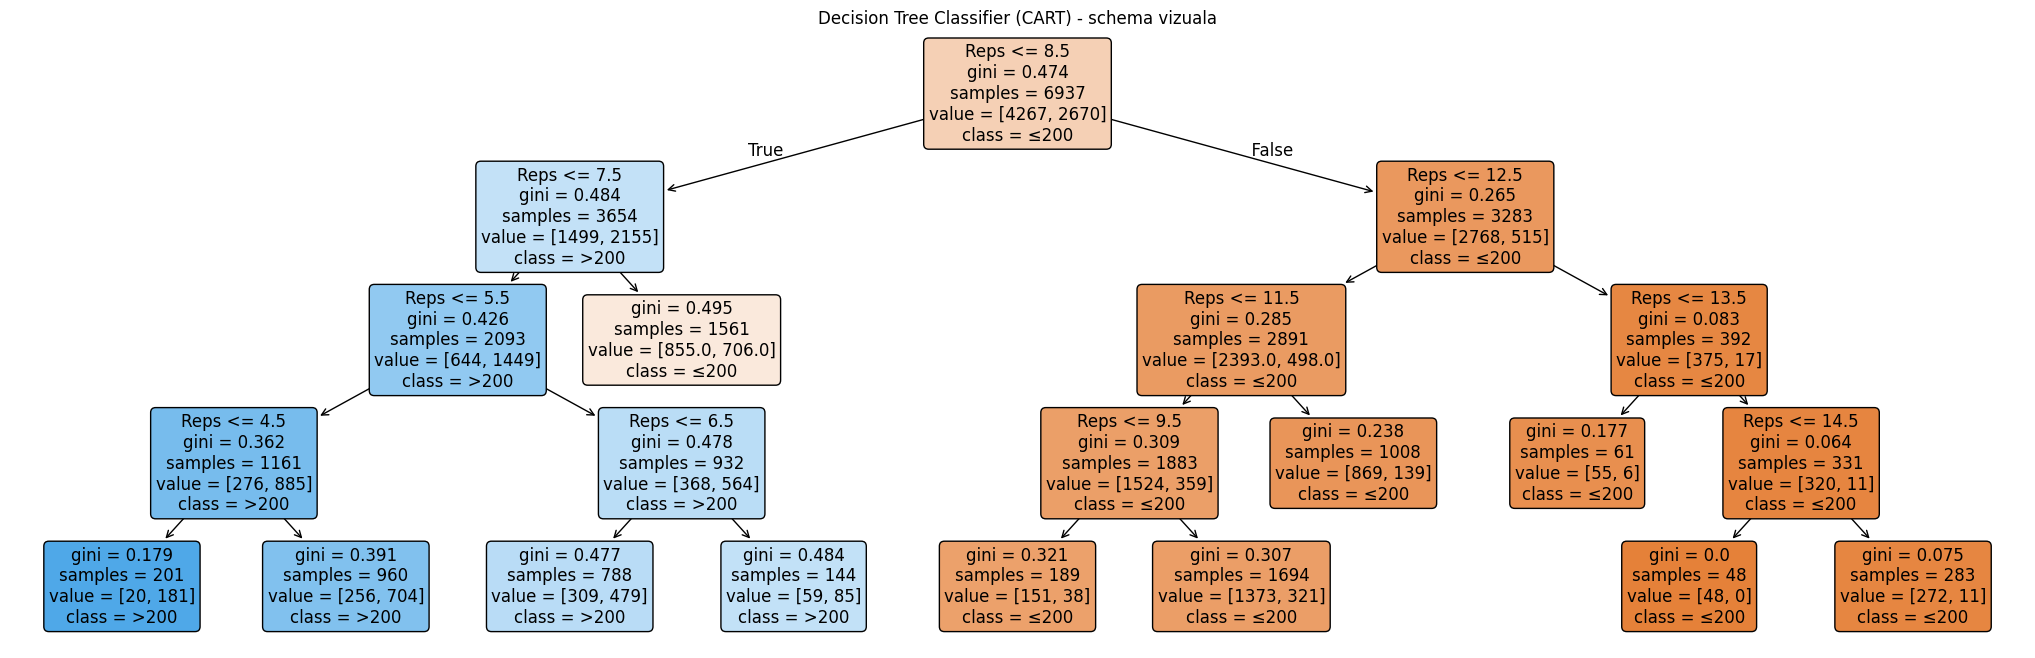

In [28]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

# 1. Extragem regulile in text
rules = export_text(clf, feature_names=features)
print(rules)

# 2. Afisam arborele direct cu plot_tree
plt.figure(figsize=(26, 8))
plot_tree(
    clf,
    feature_names=features,
    class_names=["≤200", ">200"],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree Classifier (CART) - schema vizuala")
plt.show()



**Interpretare a regulilor**:
- Fiecare ramură a arborelui este reprezentată de o listă de condiții de tip `if ...` urmate de predicția de clasă.
- Regulile pot fi utilizate pentru a construi un sistem de recomandare care decide dacă un set de antrenament va fi considerat 'heavy'.
- Studiu de caz: de exemplu, dacă `Reps <= 5` și `Seconds > 30`, atunci modelul prezice `>200 lb`.



## Concluzie generală

Arborii de decizie (CART) oferă un mod intuitiv și interpretabil de clasificare și regresie pe datele de antrenament weightlifting:
- Procesele de **splitting** (bazate pe Gini) găsesc praguri relevante.
- Arborii de clasificare oferă reguli simple pentru decizia `heavy`.
- Arborii de regresie particularizează predicția greutății cu o structură de tree similară.

Aceste modele pot ghida decizii de antrenament și optimizare a programelor de exerciții.
